In [1]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import zipfile

## 1. Loading data and creating a dataset

In [3]:
# Load each dataset
df_1 = pd.read_csv("C.csv")
df_2 = pd.read_csv("HES.csv")
df_3 = pd.read_csv("INTC.csv")
df_4 = pd.read_csv("MCHP.csv")

In [5]:
# Add a name column with corresponding name to each
df_1["name"] = "C"
df_2["name"] = "HES"
df_3["name"] = "INTC"
df_4["name"] = "MCHP"

# heck the result
df_1.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,name
0,2017-11-13,72.150002,71.480003,71.669998,71.989998,13500600.0,63.376659,C
1,2017-11-14,71.809998,71.040001,71.650002,71.529999,13188900.0,62.971699,C
2,2017-11-15,72.070000,70.019997,70.620003,71.730003,17541800.0,63.147797,C


In [6]:
# Concatenate the datasets into one:
stock_df = pd.concat([df_1, df_2, df_3, df_4], axis = 0, ignore_index = True)

# check the dataset
stock_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,name
0,2017-11-13,72.150002,71.480003,71.669998,71.989998,13500600.0,63.376659,C
1,2017-11-14,71.809998,71.040001,71.650002,71.529999,13188900.0,62.971699,C
2,2017-11-15,72.070000,70.019997,70.620003,71.730003,17541800.0,63.147797,C
3,2017-11-16,72.320000,71.510002,72.110001,71.669998,12415600.0,63.094948,C
4,2017-11-17,71.830002,70.940002,71.160004,71.330002,11813000.0,62.795628,C


In [7]:
# check the structure of the data
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5036 entries, 0 to 5035
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5036 non-null   object 
 1   High       5036 non-null   float64
 2   Low        5036 non-null   float64
 3   Open       5036 non-null   float64
 4   Close      5036 non-null   float64
 5   Volume     5036 non-null   float64
 6   Adj Close  5036 non-null   float64
 7   name       5036 non-null   object 
dtypes: float64(6), object(2)
memory usage: 314.9+ KB


In [ ]:
# What are the column names?
stock_df.columns

In [8]:
# check the type of date -> need to convert it into DateTime
type(stock_df["Date"][0])

str

In [10]:
# Convert the Date column to DateTime format
stock_df["Date"] = pd.to_datetime(stock_df["Date"], format = "%Y-%m-%d")

# Check the datatype -> good
type(stock_df["Date"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
# Set the date column as index
stock_df.set_index("Date", inplace = True)

KeyError: "None of ['Date'] are in the columns"

In [13]:
# Check
stock_df.head(3) # Date as Index

,High,Low,Open,Close,Volume,Adj Close,name
Date,,,,,,,
2017-11-13,72.150002,71.480003,71.669998,71.989998,13500600.0,63.376659,C
2017-11-14,71.809998,71.040001,71.650002,71.529999,13188900.0,62.971699,C
2017-11-15,72.070000,70.019997,70.620003,71.730003,17541800.0,63.147797,C


In [14]:
# Sort by date inplace
stock_df.sort_index(ascending = True, inplace = True)

# Check head
stock_df.head(3)

,High,Low,Open,Close,Volume,Adj Close,name
Date,,,,,,,
2017-11-13,72.150002,71.480003,71.669998,71.989998,13500600.0,63.376659,C
2017-11-13,45.939999,45.250000,45.259998,45.750000,18999000.0,41.969551,INTC
2017-11-13,46.900002,45.889999,46.849998,46.590000,3540600.0,43.165344,HES


In [15]:
# Check the tail
stock_df.tail(3)

,High,Low,Open,Close,Volume,Adj Close,name
Date,,,,,,,
2022-11-11,50.570000,48.439999,48.500000,50.189999,26003700.0,50.189999,C
2022-11-11,30.629999,28.870001,28.930000,30.430000,49811800.0,30.430000,INTC
2022-11-11,76.279999,73.050003,74.230003,75.830002,4963700.0,75.830002,MCHP


### Is there a company that has identical Close and Adjusted close price?

As we can see, each company has at least some values of Adjusted Close and Close price that are different, which means that no company has these values identical

If it had..

In [16]:
# Create a difference column
stock_df["diff_close"] = stock_df["Close"] - stock_df["Adj Close"]

In [17]:
# Grouped dataset
stock_df_grouped = stock_df.groupby("name")

stock_df_grouped.head()

,High,Low,Open,Close,Volume,Adj Close,name,diff_close
Date,,,,,,,,
2017-11-13,72.150002,71.480003,71.669998,71.989998,13500600.0,63.376659,C,8.613338
2017-11-13,45.939999,45.250000,45.259998,45.750000,18999000.0,41.969551,INTC,3.780449
2017-11-13,46.900002,45.889999,46.849998,46.590000,3540600.0,43.165344,HES,3.424656
2017-11-13,45.665001,45.235001,45.505001,45.509998,2797600.0,40.574093,MCHP,4.935905
2017-11-14,71.809998,71.040001,71.650002,71.529999,13188900.0,62.971699,C,8.558300
2017-11-14,45.919998,45.320000,45.700001,45.860001,22201200.0,42.070461,INTC,3.789539
2017-11-14,45.560001,45.005001,45.334999,45.505001,3018400.0,40.569630,MCHP,4.935371
2017-11-14,46.410000,44.709999,46.180000,44.910000,5414000.0,41.608841,HES,3.301159
2017-11-15,72.070000,70.019997,70.620003,71.730003,17541800.0,63.147797,C,8.582207


### 2. Highest and lowest Adjusted Close price for each company recorded

In [18]:
# Highest adjusted close price per company
stock_df.groupby("name")["Adj Close"].max()

name
C        78.082741
HES     148.740005
INTC     67.842155
MCHP     89.349998
Name: Adj Close, dtype: float64

In [19]:
# lowest adjusted close price per company
stock_df.groupby("name")["Adj Close"].min()

name
C       32.968502
HES     28.099527
INTC    25.040001
MCHP    27.012880
Name: Adj Close, dtype: float64

### 3. Logarithmic returns and distribution

In [21]:
close = stock_df["Adj Close"]

# Daily log returns per company

daily_returns = np.log(close).diff(periods = 1)
daily_returns.head(2) # First observation lost as expected

Date
2017-11-13         NaN
2017-11-13   -0.412151
Name: Adj Close, dtype: float64

In [23]:
# add the column to the master dataset
stock_df["log_returns"] = daily_returns

# Check
stock_df.head(3)

,High,Low,Open,Close,Volume,Adj Close,name,diff_close,log_returns
Date,,,,,,,,,
2017-11-13,72.150002,71.480003,71.669998,71.989998,13500600.0,63.376659,C,8.613338,NaN
2017-11-13,45.939999,45.250000,45.259998,45.750000,18999000.0,41.969551,INTC,3.780449,-0.412151
2017-11-13,46.900002,45.889999,46.849998,46.590000,3540600.0,43.165344,HES,3.424656,0.028094


In [24]:
# minimum log returns per company
stock_df.groupby("name")["log_returns"].min()

name
C      -1.179445
HES    -0.557911
INTC   -1.654283
MCHP   -0.830537
Name: log_returns, dtype: float64

In [25]:
# maximum log returns per company
stock_df.groupby("name")["log_returns"].max()

name
C       0.699642
HES     1.655459
INTC    0.535994
MCHP    0.913065
Name: log_returns, dtype: float64

In [27]:
# mean log returns per company
stock_df.groupby("name")["log_returns"].mean()

name
C       0.072201
HES     0.169370
INTC   -0.173266
MCHP   -0.068106
Name: log_returns, dtype: float64

In [28]:
# median log returns per company
stock_df.groupby("name")["log_returns"].median()

name
C       0.083637
HES     0.085381
INTC   -0.163443
MCHP   -0.072301
Name: log_returns, dtype: float64

### 4. Highest gain and loss days per company

In [29]:
# Highest gain days
stock_df.groupby("name")["log_returns"].idxmax()

name
C      2018-10-10
HES    2022-11-07
INTC   2020-03-23
MCHP   2022-11-11
Name: log_returns, dtype: datetime64[ns]

In [30]:
# Highest loss days
stock_df.groupby("name")["log_returns"].idxmin()

name
C      2022-11-07
HES    2020-03-16
INTC   2022-10-26
MCHP   2022-11-04
Name: log_returns, dtype: datetime64[ns]

### 5. Average calendar weekly volume per company

### 6. Which company recorded highest overall return over the whole period

In [33]:
# Create a return dataset
returns = stock_df[["name", "log_returns"]]
returns.head()

,name,log_returns
Date,,
2017-11-13,C,NaN
2017-11-13,INTC,-0.412151
2017-11-13,HES,0.028094
2017-11-13,MCHP,-0.061908
2017-11-14,C,0.439556


In [35]:
# Names as columns, returns as rows for each day
returns_final = returns.pivot(columns = "name", values = "log_returns")
returns_final.head()

name,C,HES,INTC,MCHP
Date,,,,
2017-11-13,NaN,0.028094,-0.412151,-0.061908
2017-11-14,0.439556,0.025293,-0.403340,-0.036326
2017-11-15,0.417165,-0.445165,0.030272,-0.043291
2017-11-16,0.409885,0.022591,0.024871,-0.444151
2017-11-17,0.433684,0.019775,-0.008105,-0.005958


In [91]:
# Calculate overall return per company
returns_final["C"].apply(lambda x: np.product(1 + x))

# analogously for all
returns_final["HES"].apply(lambda x: np.product(1 + x))
returns_final["INTC"].apply(lambda x: np.product(1 + x))
returns_final["MCHP"].apply(lambda x: np.product(1 + x))



Date
2017-11-13    0.938092
2017-11-14    0.963674
2017-11-15    0.956709
2017-11-16    0.555849
2017-11-17    0.994042
                ...   
2022-11-07    1.372961
2022-11-08    1.384725
2022-11-09    1.882289
2022-11-10    1.909818
2022-11-11    1.913065
Name: MCHP, Length: 1259, dtype: float64

### 7. Plot the log returns

In [37]:
# Create a date column by extracting from index
returns_final["date"] = pd.to_datetime(returns_final.index)
returns_final.head()

name,C,HES,INTC,MCHP,date
Date,,,,,
2017-11-13,NaN,0.028094,-0.412151,-0.061908,2017-11-13
2017-11-14,0.439556,0.025293,-0.403340,-0.036326,2017-11-14
2017-11-15,0.417165,-0.445165,0.030272,-0.043291,2017-11-15
2017-11-16,0.409885,0.022591,0.024871,-0.444151,2017-11-16
2017-11-17,0.433684,0.019775,-0.008105,-0.005958,2017-11-17


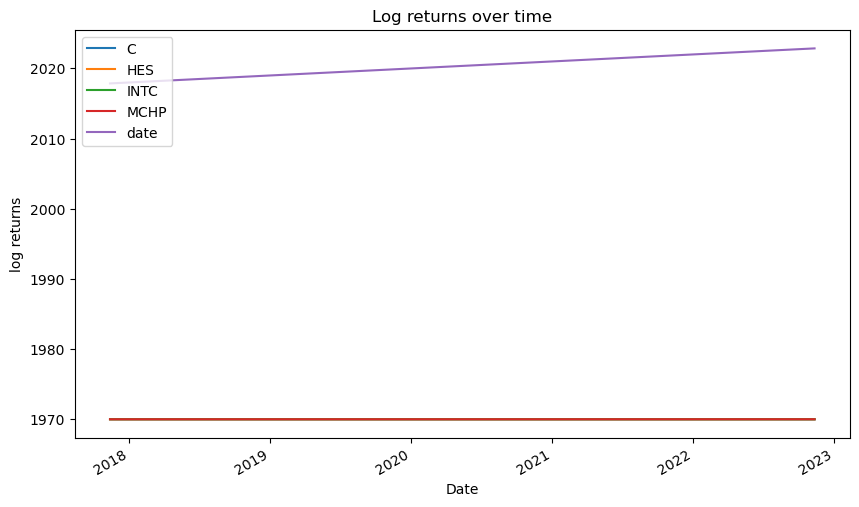

In [38]:
# Plot the returns
returns_final.plot(figsize=(10, 6))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('log returns')
plt.title('Log returns over time')

# Show the plot
plt.legend(loc='upper left')
plt.show()

### 8. Distribution of Log returns per company

## part 2

In [41]:
SP_data = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")

SP_data.head(5)

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [48]:
# structure
SP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Symbol       503 non-null    object
 1   Security     503 non-null    object
 2   GICS_Sector  503 non-null    object
 3   hq           503 non-null    object
 4   included     458 non-null    object
 5   Founded      503 non-null    object
dtypes: object(6)
memory usage: 23.7+ KB


### 1. Which companies did not enter the date of inclusion?

45 companies did not include the info

In [43]:
# Get just unique companies
SP_data_cleaned = SP_data.drop_duplicates()

In [50]:
# How many NA values are in the included
SP_data_cleaned[SP_data_cleaned["included"].isna()].count()

Symbol         45
Security       45
GICS_Sector    45
hq             45
included        0
Founded        45
dtype: int64

### 2. Oldest company, average age

In [69]:
# take the first year in the Founded column and discard the rest
SP_data_cleaned['Founded'] = SP_data_cleaned['Founded'].str[:4]

SP_data_cleaned.head(3)

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888


In [52]:
# Drop the not included
SP_data_cleaned.included.dropna(inplace = True)

In [56]:
# Convert the included column to datetime
SP_data_cleaned["included"] = pd.to_datetime(SP_data_cleaned["included"], dayfirst = True, errors = "coerce")

# check
type(SP_data_cleaned["included"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
# Oldest -> BNY Mellon
min_date = SP_data_cleaned["Founded"].min()

SP_data_cleaned[SP_data_cleaned["Founded"] == min_date]

,Symbol,Security,GICS_Sector,hq,included,Founded
71,BK,BNY Mellon,Financials,"New York City, New York",1995-03-31,1784


In [60]:
# Youngest -> Warner Bros. Discovery
max_date = SP_data_cleaned["Founded"].max()

SP_data_cleaned[SP_data_cleaned["Founded"] == max_date]

,Symbol,Security,GICS_Sector,hq,included,Founded
481,WBD,Warner Bros. Discovery,Communication Services,"New York City, New York",2022-04-11,2022


In [70]:
# Convert Founded date to integer
SP_data_cleaned["Founded"] = pd.to_numeric(SP_data_cleaned["Founded"])

In [71]:
# Add an age column in years
SP_data_cleaned["age"] = 2023 - SP_data_cleaned["Founded"]

SP_data_cleaned.head(5)


,Symbol,Security,GICS_Sector,hq,included,Founded,age
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902.0,121.0
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916.0,107.0
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888.0,135.0
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,NaN,NaN
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981.0,42.0


In [ ]:
# parse Hq column 

In [74]:
# Average age of Founded -> 68 years
int(SP_data_cleaned["age"].mean())

68

### 5. Join the datasets

In [76]:
companies_df = pd.read_csv("https://ies-python-midterm.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv")

companies_df.head(5)

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment


In [79]:
# Join the data on Symbol
joined_df = pd.merge(companies_df, SP_data_cleaned, how = "inner", on = "Symbol")

joined_df.head(5)

,Symbol,subindustry,Security,GICS_Sector,hq,included,Founded,age
0,MMM,Industrial Conglomerates,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902.0,121.0
1,AOS,Building Products,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916.0,107.0
2,ABT,Health Care Equipment,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888.0,135.0
3,ABBV,Pharmaceuticals,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,NaN,NaN
4,ABMD,Health Care Equipment,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981.0,42.0


In [82]:
# subindustry distribution
sub_ind = joined_df.groupby("subindustry")["subindustry"].count()

subindustry
Advertising                             2
Aerospace & Defense                    10
Agricultural & Farm Machinery           1
Agricultural Products                   1
Air Freight & Logistics                 4
                                       ..
Tobacco                                 2
Trading Companies & Distributors        1
Trucking                                2
Water Utilities                         1
Wireless Telecommunication Services     1
Name: subindustry, Length: 122, dtype: int64

In [83]:
sub_ind = joined_df.groupby("subindustry")["subindustry"].count()

<function matplotlib.pyplot.show(close=None, block=None)>

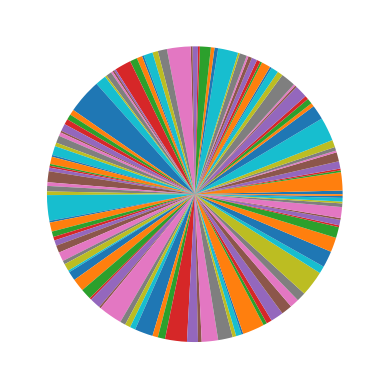

In [85]:
# plot the distribution of subindustry
plt.pie(sub_ind)
plt.show